## Objectives

In this project we will work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:
- population (the population as of 2015)
- population_growth (the annual population growth rate as a percentage)
- area (the total land and water area)

https://www.cia.gov/library/publications/the-world-factbook/

In [41]:
import sqlite3
import pandas as pd

In [42]:
conn = sqlite3.connect("factbook.db")

q1 = "select * from sqlite_master where type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [43]:
q2 = "select * from facts limit 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


### Now we will write some summary statistics.

In [44]:
q3 = "select min(population) as min_pop, max(population) as max_pop, min(population_growth) as min_pop_growth, max(population_growth) as max_pop_growth from facts;"
pd.read_sql_query(q3, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


There are strange results for min_pop and max_pop metrics. Let's dive into them.

In [45]:
q4 = "select name from facts where population = 0 ;"
pd.read_sql_query(q4, conn)

,name
0,Antarctica


In [46]:
q5 = "select name from facts where population == (select max(population) from facts);"
pd.read_sql_query(q5, conn)

,name
0,World


So, it looks like that the table contains a row for the whole world which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica - the population of 0.

### Let's create some histograms removing outliers - 2 rows: World and Antarctica.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
q6 = "select name, population, population_growth, birth_rate, death_rate from facts where population != (select max(population) from facts) and population != (select min(population) from facts);"

pd.read_sql_query(q6, conn)

,name,population,population_growth,birth_rate,death_rate
0,Afghanistan,32564342,2.32,38.57,13.89
1,Albania,3029278,0.30,12.92,6.58
2,Algeria,39542166,1.84,23.67,4.31
3,Andorra,85580,0.12,8.13,6.96
4,Angola,19625353,2.78,38.78,11.49
5,Antigua and Barbuda,92436,1.24,15.85,5.69
6,Argentina,43431886,0.93,16.64,7.33
7,Armenia,3056382,0.15,13.61,9.34
8,Australia,22751014,1.07,12.15,7.14
9,Austria,8665550,0.55,9.41,9.42


### Histograms

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21a56e2710>,
      dtype=object)

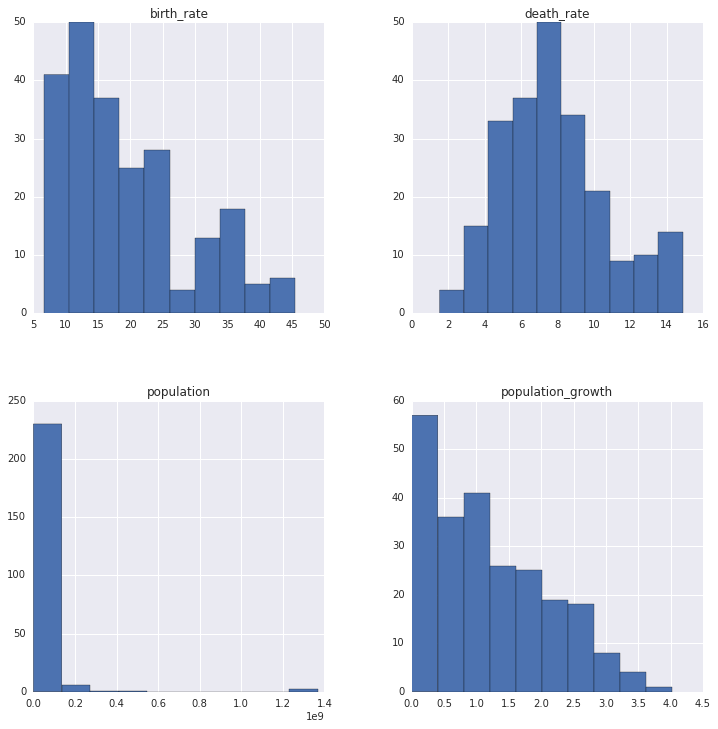

In [49]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)



pd.read_sql_query(q6, conn).hist(ax=ax)

### Which countries have the highest population density?

In [50]:
q7 = "select name, cast(population as float) / cast(area as float) as density from facts order by density desc;"
pd.read_sql_query(q7, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926
